In [1]:
import numpy as np
from tqdm import trange
import heapq
DEFAULT_FILENAME = "input18.txt"

Right = (0, 1)
Down = (1, 0)
Left = (0, -1)
Up = (-1, 0)

Dir = {
    "U": Up,
    "D": Down,
    "L": Left,
    "R": Right,
}
def read_chars(filename = DEFAULT_FILENAME):
    res = []
    with open(filename, "r") as f:
        for li in f:
            li = li.split()
            res.append([Dir[li[0]], int(li[1]), li[2][1:-1]])
    return res

Part 1: 40745


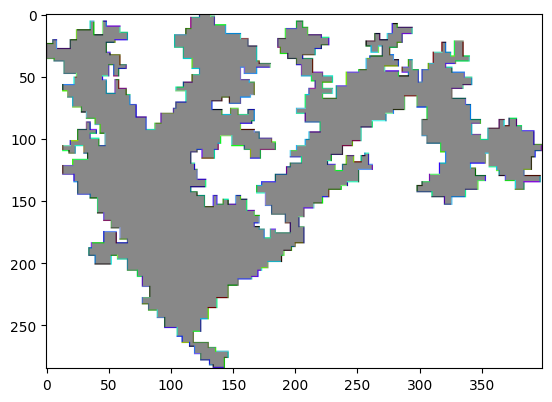

In [2]:
instructions = read_chars()

min_coor = [0, 0]
max_coor = [0, 0]
current_coor = [0, 0]
for c, le, _ in instructions:
    for i in range(2):
        current_coor[i] += c[i] * le
        if current_coor[i] > max_coor[i]:
            max_coor[i] = current_coor[i]
        if current_coor[i] < min_coor[i]:
            min_coor[i] = current_coor[i]
grid_size = [1, 1] + np.abs(min_coor) + np.abs(max_coor)
start_coor = np.array(min_coor) * -1

# pretty printing purpose
EMPTY = "       "
EMPTY = "#FFFFFF"
FILLED = "#888888"
grid = [[EMPTY for _ in range(grid_size[1])] for _ in range(grid_size[0])]
# grid = np.chararray(grid_size, itemsize=7)
coor = start_coor
for c, le, color in instructions:
  _dir = np.array(c)
  for _ in range(le):
    coor += _dir
    grid[coor[0]][coor[1]] = color

# grow
# blind guess is working
flood_queue = [np.array(grid_size) // 2]
while len(flood_queue):
  coor = flood_queue.pop()
  if grid[coor[0]][coor[1]] != EMPTY:
    continue
  else:
    grid[coor[0]][coor[1]] = FILLED
  for d in [Up, Right, Left, Down]:
    flood_queue.append(coor + np.array(d))

# count
count = 0
for x, line in enumerate(grid):
  pull_up_count = 0
  prev = EMPTY
  for y, item in enumerate(line):
    if item != EMPTY:
      count += 1
    prev = item

print(f"Part 1: {count}")

grid_int = np.zeros((*grid_size, 3), dtype=int)
for x, line in enumerate(grid):
  for y, item in enumerate(line):
    for i in range(3):
      grid_int[x, y, i] = int(item[1+i*2:3+i*2], 16)
import matplotlib.pyplot as plt
plt.imshow(grid_int)
plt.show()

In [3]:
Dir_2 = {
    "0": Right,
    "1": Down,
    "2": Left,
    "3": Up,
}
instructions_1 = [(ins[0], ins[1]) for ins in read_chars()]
instructions_2 = [(Dir_2[ins[2][-1]], int(ins[2][1:-1], 16)) for ins in read_chars()]
for part, instructions in enumerate([instructions_1, instructions_2]):
    # shoelace method
    coordinates = []
    current_coor = [0, 0]
    line_len = 0
    for c, le in instructions:
        for i in range(2):
            current_coor[i] += c[i] * le
        line_len += le
        coordinates.append(np.array(current_coor))
    coordinates = np.array(coordinates)
    x_coordinates, y_coordinates = coordinates.transpose((1, 0))
    area = np.abs(np.sum(np.roll(x_coordinates, 1) * y_coordinates - np.roll(x_coordinates, -1) * y_coordinates)) // 2
    area += line_len // 2 + 1 # half of the line is inside area, extra 1 because it is a loop
    print(f"Part {part+1}: {area}")

Part 1: 40745
Part 2: 90111113594927
